In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_train = pd.read_csv('/content/drive/MyDrive/EDA_Playlist/BlackFriday/BlackFriday_dataset/BF_EDA/BlackFriday_train.csv')

In [8]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [9]:
df_test = pd.read_csv("/content/drive/MyDrive/EDA_Playlist/BlackFriday/BlackFriday_dataset/BF_EDA/BlackFriday_test.csv")

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [12]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [14]:
df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [16]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [17]:
df.drop('User_ID',axis=1,inplace=True)

In [18]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [19]:
print('The Numerical Fetaures are : {}'.format(num_features))
print('The Categorical Fetaures are : {}'.format(cat_features))

The Numerical Fetaures are : ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
The Categorical Fetaures are : ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handling Missing Values and Categorical features

In [21]:
df1 = df.copy()

## Filling the missing values the mode

In [22]:
df1['Product_Category_2'].fillna(df1['Product_Category_2'].mode()[0],inplace=True)

In [23]:
df1['Product_Category_3'].fillna(df1['Product_Category_3'].mode()[0],inplace=True)

In [24]:
df1.drop(['Product_ID'],axis=1,inplace=True)

In [25]:
df1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


## A function to display Unique features, value_counts, feature based target mean and feature based target count along with respective Bar and Pie chart.

-  Here you don't need to do univarate analysis separately as the piechart makes up for it

In [26]:
import matplotlib.colors as mcolors

In [27]:
def Bivariate_Analysis(df,feature : str,target_variable : str):
    Unique = df[feature].unique()
    Value_counts = df[feature].value_counts()
    Mean_Purchase_Feature = df.groupby(feature)[target_variable].mean().sort_values(ascending=False).round(2)
    Count_Purchase_Feature =  df.groupby(feature)[target_variable].count().sort_values(ascending=False)
    
    
    colors = np.random.choice(list(mcolors.CSS4_COLORS.keys()), len(Unique), replace=False)
    plt.rcParams['axes.facecolor'] = 'whitesmoke'
    
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    Mean_Purchase_Feature.plot(kind='barh',color=colors,ax=ax[0],edgecolor='black')
    Count_Purchase_Feature.plot(kind='pie',autopct='%1.1f%%',colors=colors, shadow=True,ax=ax[1],explode = [0.13]*len(Unique))
    
    
    ax[0].set_title('Mean Purchase based on {}'.format(feature))
    ax[0].set_xlabel('Mean Purchase')


    ax[1].set_title('Purchase Count based on {}'.format(feature),x=0.8)
    ax[1].set_ylabel('Count',y=0.6)

    plt.show()
    
    print('Mean Purchase based on {} '.format(feature))
    for value, mean  in zip(Mean_Purchase_Feature.keys(), Mean_Purchase_Feature.values):
        print('  * {}: {} '.format(value, mean))
    
    print('Purchase Count based on {} : '.format(feature))
    for value, count in zip(Count_Purchase_Feature.keys(), Count_Purchase_Feature.values):
        print('  * {}: {}'.format(value, count))



## 1. City Category

In [28]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

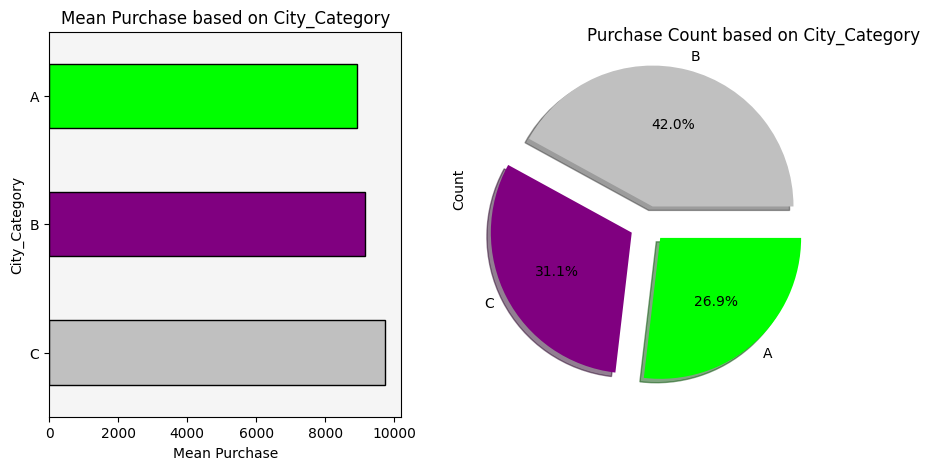

Mean Purchase based on City_Category 
  * C: 9719.92 
  * B: 9151.3 
  * A: 8911.94 
Purchase Count based on City_Category : 
  * B: 231173
  * C: 171175
  * A: 147720


In [29]:
Bivariate_Analysis(df1,'City_Category','Purchase')

### SInce C category have highest average spend followed by B and A, we will map them accordingly

In [30]:
City_Categ = {
    'A':1,
    'B':2,
    'C':3
}
df1['City_Category']=df1['City_Category'].map(City_Categ)

## 2. Gender

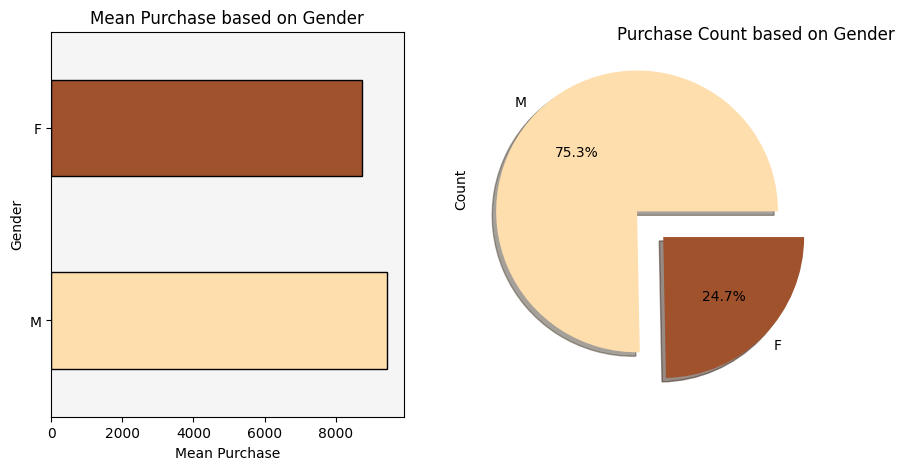

Mean Purchase based on Gender 
  * M: 9437.53 
  * F: 8734.57 
Purchase Count based on Gender : 
  * M: 414259
  * F: 135809


In [31]:
Bivariate_Analysis(df1,'Gender','Purchase')

### Since, percentage of Male spending is more than Females also the count of Men purchasing is more, we will encode them accordingly.

In [32]:
df1['Gender'] = df1['Gender'].map({'F':0,'M':1})

## 3. Stay In Current City Years

In [33]:
df1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
df1['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)

<ipython-input-34-2553ff4d6ddd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)


### As we can see, the number of years staying in a city does not affect the purcase amount that much but there are differences in the purchase count based on the years stayed. People staying for 1 year tend to buy the most.

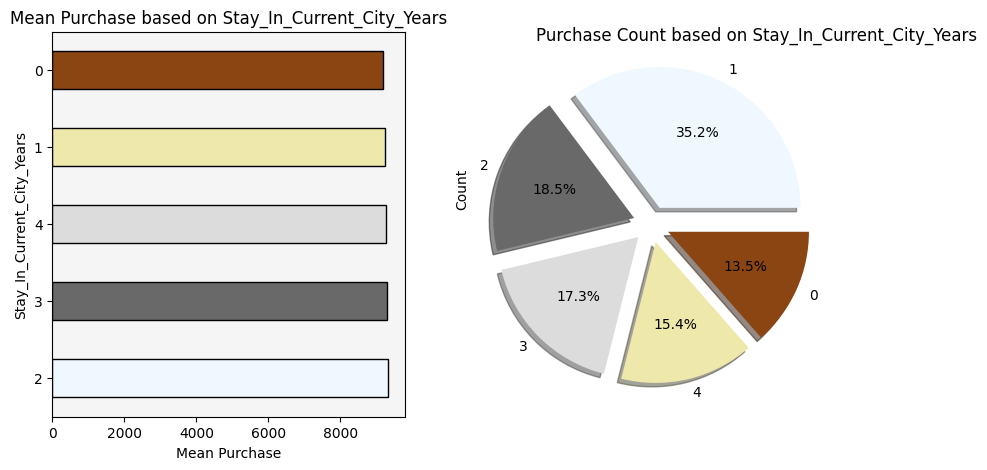

Mean Purchase based on Stay_In_Current_City_Years 
  * 2: 9320.43 
  * 3: 9286.9 
  * 4: 9275.6 
  * 1: 9250.15 
  * 0: 9180.08 
Purchase Count based on Stay_In_Current_City_Years : 
  * 1: 193821
  * 2: 101838
  * 3: 95285
  * 4: 84726
  * 0: 74398


In [35]:
Bivariate_Analysis(df1,'Stay_In_Current_City_Years','Purchase')

## 4. Age

##### As you can see, the age is given as range and one value has + sign. We need to handle it!!

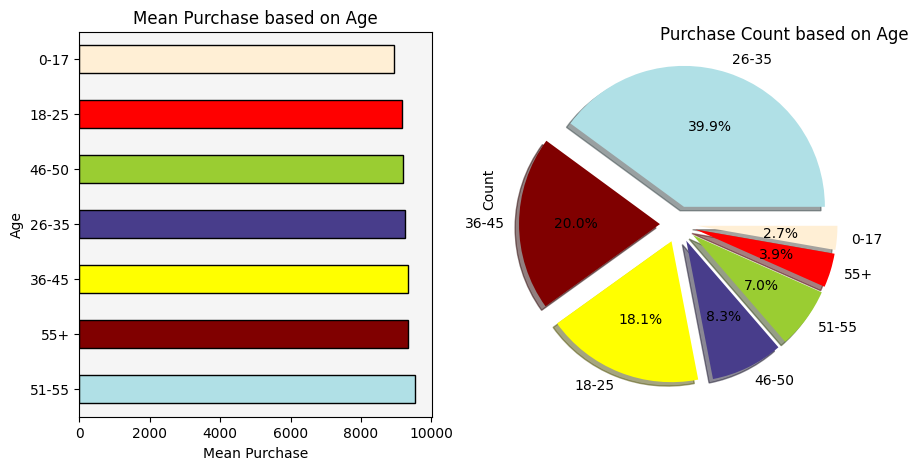

Mean Purchase based on Age 
  * 51-55: 9534.81 
  * 55+: 9336.28 
  * 36-45: 9331.35 
  * 26-35: 9252.69 
  * 46-50: 9208.63 
  * 18-25: 9169.66 
  * 0-17: 8933.46 
Purchase Count based on Age : 
  * 26-35: 219587
  * 36-45: 110013
  * 18-25: 99660
  * 46-50: 45701
  * 51-55: 38501
  * 55+: 21504
  * 0-17: 15102


In [36]:
Bivariate_Analysis(df1,'Age','Purchase')

### Assigning labels to age group based on their purchasing power makes more sense

In [37]:
df1['Age'] = df1['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

### Important to check the dtypes of all columns
All catgegorical colmns are now int

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 59.8 MB


In [39]:
df1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0


# Exploring Numerical variables

In [40]:
num_features

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

## 1. Occupation

### As we can see, the mean Purchase amount does not vary much with the Occupation, thus, no need to change

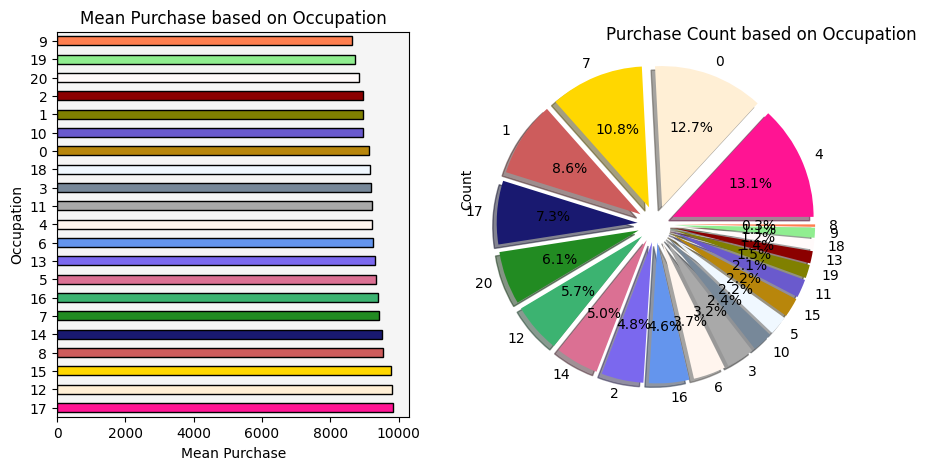

Mean Purchase based on Occupation 
  * 17: 9821.48 
  * 12: 9796.64 
  * 15: 9778.89 
  * 8: 9532.59 
  * 14: 9500.7 
  * 7: 9425.73 
  * 16: 9394.46 
  * 5: 9333.15 
  * 13: 9306.35 
  * 6: 9256.54 
  * 4: 9213.98 
  * 11: 9213.85 
  * 3: 9178.59 
  * 18: 9169.66 
  * 0: 9124.43 
  * 10: 8959.36 
  * 1: 8953.19 
  * 2: 8952.48 
  * 20: 8836.49 
  * 19: 8710.63 
  * 9: 8637.74 
Purchase Count based on Occupation : 
  * 4: 72308
  * 0: 69638
  * 7: 59133
  * 1: 47426
  * 17: 40043
  * 20: 33562
  * 12: 31179
  * 14: 27309
  * 2: 26588
  * 16: 25371
  * 6: 20355
  * 3: 17650
  * 10: 12930
  * 5: 12177
  * 15: 12165
  * 11: 11586
  * 19: 8461
  * 13: 7728
  * 18: 6622
  * 9: 6291
  * 8: 1546


In [41]:
Bivariate_Analysis(df1,'Occupation','Purchase')

__The people belonging to occupation 4 had most transactions while those belonging to 8 had the lowest__

## 2. Maritial Status
#### 0 : Single
#### 1 : Married

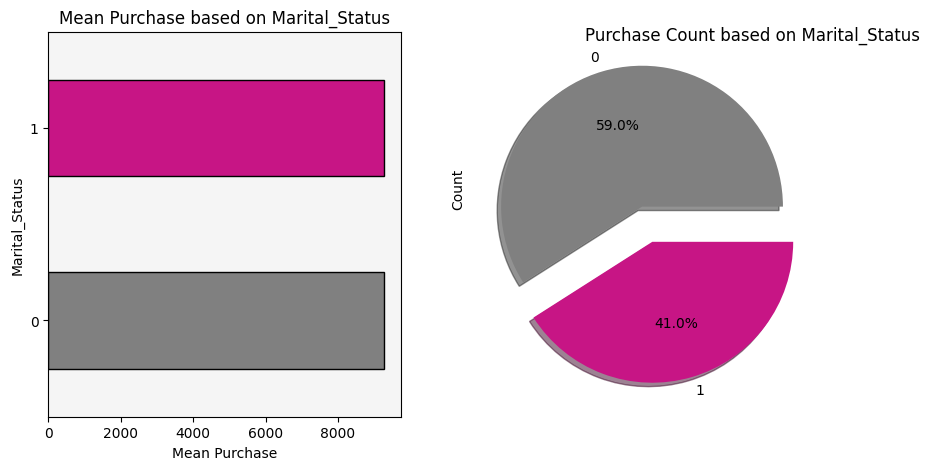

Mean Purchase based on Marital_Status 
  * 0: 9265.91 
  * 1: 9261.17 
Purchase Count based on Marital_Status : 
  * 0: 324731
  * 1: 225337


In [42]:
Bivariate_Analysis(df1,'Marital_Status','Purchase')

__Not Much of an influence on the Mean purchase amount by marital status, even in terms of frequency of purchase, single and married people have bought similar amount of products__

## 3. Product Category 1

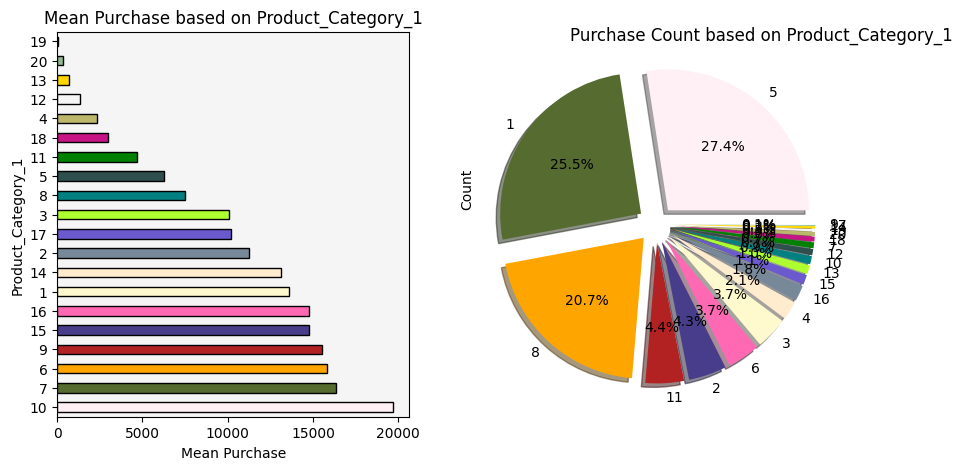

Mean Purchase based on Product_Category_1 
  * 10: 19675.57 
  * 7: 16365.69 
  * 6: 15838.48 
  * 9: 15537.38 
  * 15: 14780.45 
  * 16: 14766.04 
  * 1: 13606.22 
  * 14: 13141.63 
  * 2: 11251.94 
  * 17: 10170.76 
  * 3: 10096.71 
  * 8: 7498.96 
  * 5: 6240.09 
  * 11: 4685.27 
  * 18: 2972.86 
  * 4: 2329.66 
  * 12: 1350.86 
  * 13: 722.4 
  * 20: 370.48 
  * 19: 37.04 
Purchase Count based on Product_Category_1 : 
  * 5: 150933
  * 1: 140378
  * 8: 113925
  * 11: 24287
  * 2: 23864
  * 6: 20466
  * 3: 20213
  * 4: 11753
  * 16: 9828
  * 15: 6290
  * 13: 5549
  * 10: 5125
  * 12: 3947
  * 7: 3721
  * 18: 3125
  * 20: 2550
  * 19: 1603
  * 14: 1523
  * 17: 578
  * 9: 410


In [43]:
Bivariate_Analysis(df1,'Product_Category_1','Purchase')

__As we can see, Product 10 has the most mean purchase in Product Category 1 where as the most frequently purchased product is 5 followed by 1 and 8__

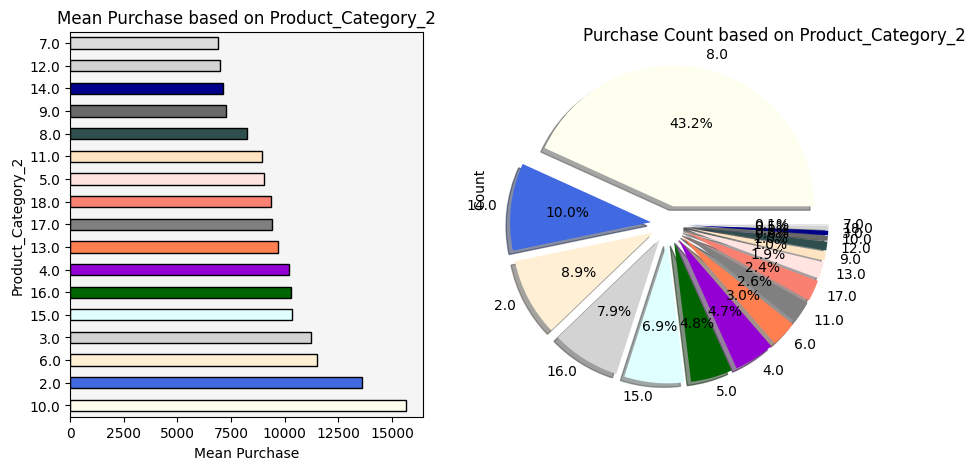

Mean Purchase based on Product_Category_2 
  * 10.0: 15648.73 
  * 2.0: 13619.36 
  * 6.0: 11503.55 
  * 3.0: 11235.36 
  * 15.0: 10357.08 
  * 16.0: 10295.68 
  * 4.0: 10215.19 
  * 13.0: 9683.35 
  * 17.0: 9421.58 
  * 18.0: 9352.44 
  * 5.0: 9027.82 
  * 11.0: 8940.58 
  * 8.0: 8261.29 
  * 9.0: 7277.01 
  * 14.0: 7105.26 
  * 12.0: 6975.47 
  * 7.0: 6884.68 
Purchase Count based on Product_Category_2 : 
  * 8.0: 237726
  * 14.0: 55108
  * 2.0: 49217
  * 16.0: 43255
  * 15.0: 37855
  * 5.0: 26235
  * 4.0: 25677
  * 6.0: 16466
  * 11.0: 14134
  * 17.0: 13320
  * 13.0: 10531
  * 9.0: 5693
  * 12.0: 5528
  * 10.0: 3043
  * 3.0: 2884
  * 18.0: 2770
  * 7.0: 626


In [44]:
Bivariate_Analysis(df1,'Product_Category_2','Purchase')

__As we can see, Product 10 has the most mean purchase in Product Category 2 where as the most frequently purchased product is 8 followed by 1 and 8__

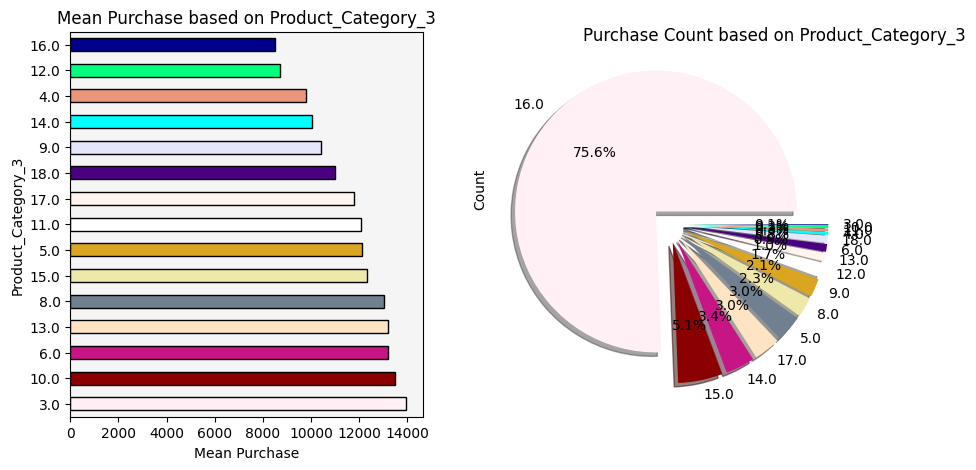

Mean Purchase based on Product_Category_3 
  * 3.0: 13939.7 
  * 10.0: 13505.81 
  * 6.0: 13194.31 
  * 13.0: 13185.12 
  * 8.0: 13024.92 
  * 15.0: 12339.37 
  * 5.0: 12117.79 
  * 11.0: 12091.44 
  * 17.0: 11769.94 
  * 18.0: 10993.98 
  * 9.0: 10431.7 
  * 14.0: 10052.59 
  * 4.0: 9794.39 
  * 12.0: 8715.51 
  * 16.0: 8516.9 
Purchase Count based on Product_Category_3 : 
  * 16.0: 415883
  * 15.0: 28013
  * 14.0: 18428
  * 17.0: 16702
  * 5.0: 16658
  * 8.0: 12562
  * 9.0: 11579
  * 12.0: 9246
  * 13.0: 5459
  * 6.0: 4890
  * 18.0: 4629
  * 4.0: 1875
  * 11.0: 1805
  * 10.0: 1726
  * 3.0: 613


In [45]:
Bivariate_Analysis(df1,'Product_Category_3','Purchase')

__As we can see, Product 3 has the most mean purchase in Product Category 2 where as the most frequently purchased product is 16 followed by 15 and 14__

## Lets look at the correlation map

In [46]:
cor = df1.corr()

<Axes: >

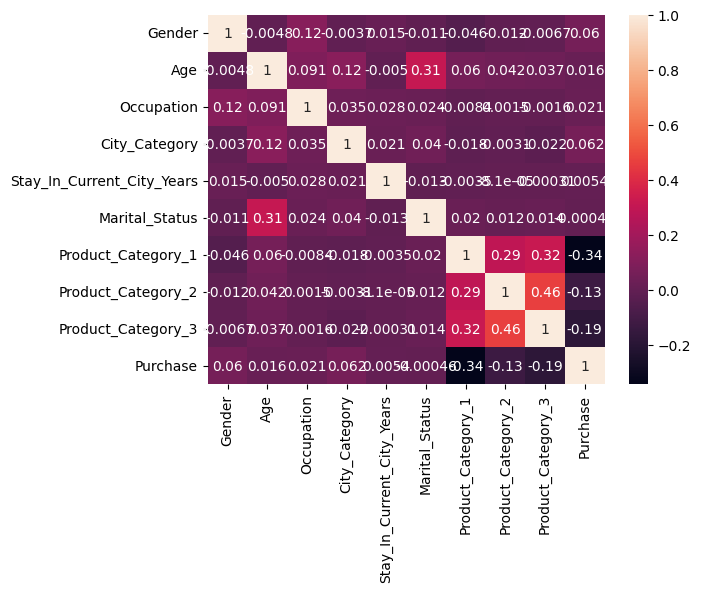

In [47]:
sns.heatmap(cor,annot=True,)

__So we can see that, Martial Status and Age are moderate positively correlated on the other hand we can see some correlations amongst product category 1,2,3 and Purchase. Product Category 1 and Purchase are highly negative correlated__

# Data Transformation

In [48]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Unique values of {column}: {unique_values}")
    print()


Unique values of Gender: [0 1]

Unique values of Age: [1 7 3 5 6 4 2]

Unique values of Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique values of City_Category: [1 3 2]

Unique values of Stay_In_Current_City_Years: [2 4 3 1 0]

Unique values of Marital_Status: [0 1]

Unique values of Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique values of Product_Category_2: [ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

Unique values of Product_Category_3: [16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

Unique values of Purchase: [ 8370. 15200.  1422. ...   123.   613.    nan]



__We will transform Occupation, Product Category 1,2 and 3. Purchase is our target varibale thus no need to transform__

In [49]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()


In [50]:
df_train = df1[df1['Purchase'].notnull()]

In [51]:
df_test = df1[df1['Purchase'].isnull()]

In [52]:
df_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,2,1,1,20,8.0,16.0,368.0
550064,0,3,1,3,3,0,20,8.0,16.0,371.0
550065,0,3,15,2,4,1,20,8.0,16.0,137.0
550066,0,7,1,3,2,0,20,8.0,16.0,365.0


In [53]:
df_train.loc[:,['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']] = SC.fit_transform(df_train.loc[:,['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])


<ipython-input-53-6cc7300c7997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']] = SC.fit_transform(df_train.loc[:,['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])


In [54]:
df_test.loc[:,['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']] = SC.transform(df_test.loc[:,['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])


<ipython-input-54-044fd3e5504e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']] = SC.transform(df_test.loc[:,['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])


In [55]:

from sklearn.ensemble import ExtraTreesRegressor


A = df_train.drop('Purchase', axis=1)
b = df_train['Purchase']


# Extra Trees feature selector
et = ExtraTreesRegressor()
et.fit(A, b)
et_feature_importances = et.feature_importances_


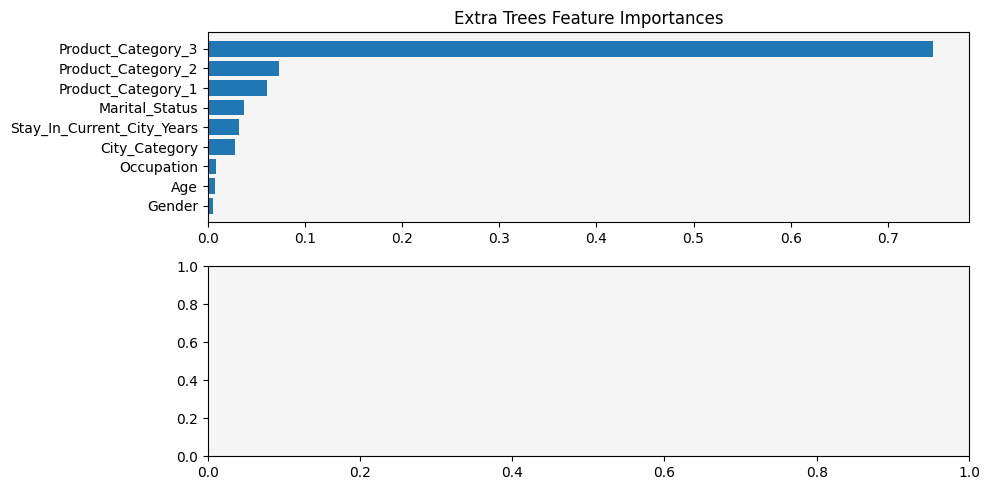

In [56]:
# Plotting the feature importances
fig, axes = plt.subplots(2, 1, figsize=(10, 5))



# Extra Trees feature importances
axes[0].barh(A.columns, np.sort(et_feature_importances))
axes[0].set_title("Extra Trees Feature Importances")



plt.tight_layout()
plt.show()

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  float64
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  float64
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 46.2 MB


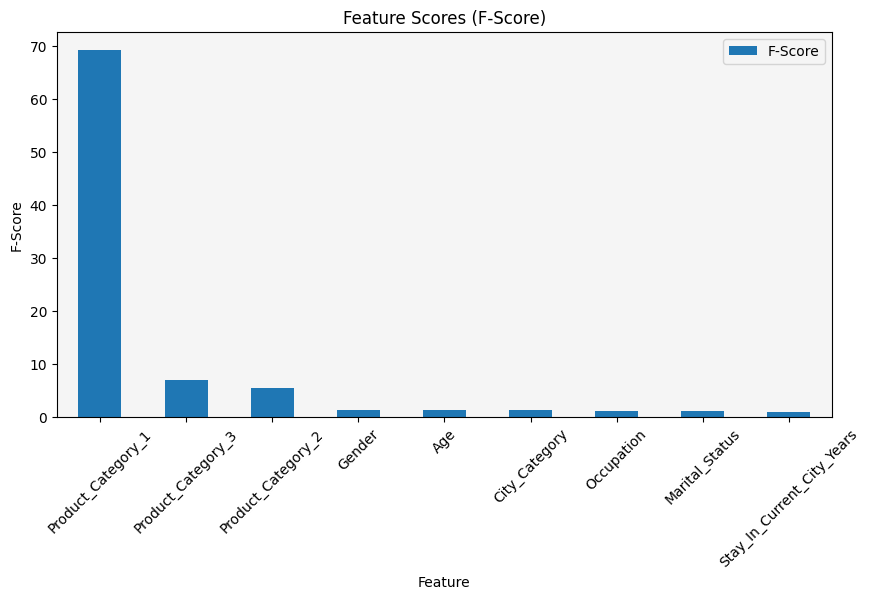

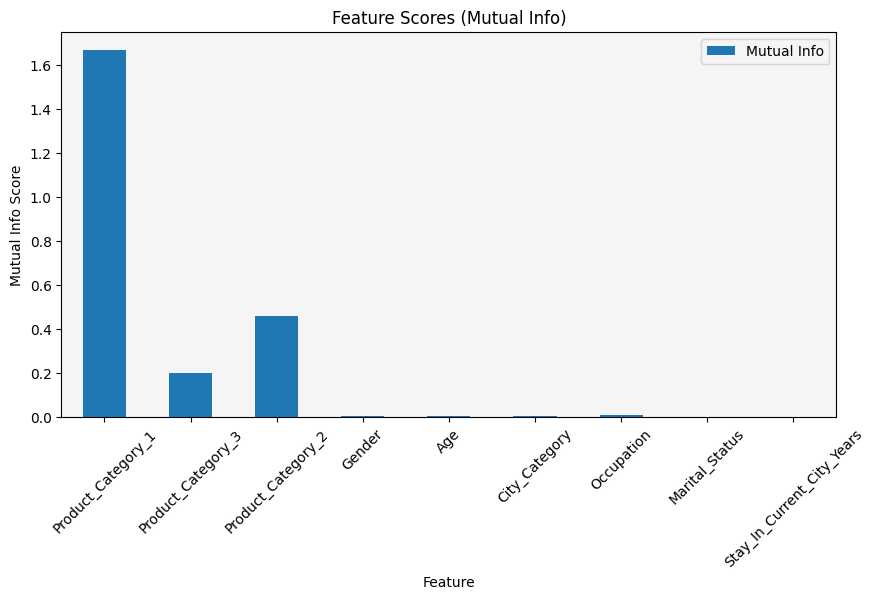

In [58]:
# Import f_classif and mutual info mutual_info_regression
from sklearn.feature_selection import f_classif, mutual_info_regression
# Applying f_classif and mutual_info_regression feature selection methods
f_scores, f_pvalues = f_classif(A,b)

# Perform feature selection using mutual_info_regression
mi_scores = mutual_info_regression(A,b)

# Create a DataFrame to store the feature scores
feature_scores = pd.DataFrame({'Feature': A.columns,
                               'F-Score': f_scores,
                               'Mutual Info': mi_scores})

# Sort the A by their scores in descending order
feature_scores.sort_values(by='F-Score', ascending=False, inplace=True)

# Plot the F-scores
fig, ax = plt.subplots(figsize=(10, 5))
feature_scores.plot(x='Feature', y='F-Score', kind='bar', ax=ax)
ax.set_ylabel('F-Score')
ax.set_title('Feature Scores (F-Score)')
plt.xticks(rotation=45)
plt.show()

# Plot the MI scores
fig, ax = plt.subplots(figsize=(10, 5))
feature_scores.plot(x='Feature', y='Mutual Info', kind='bar', ax=ax)
ax.set_ylabel('Mutual Info Score')
ax.set_title('Feature Scores (Mutual Info)')
plt.xticks(rotation=45)
plt.show()



**For the moment we will train the model with all the features , later on we will select the important ones**

In [62]:
df_train.to_csv('/content/drive/MyDrive/EDA_Playlist/BlackFriday/BlackFriday_dataset/BF_EDA/BF_train_scaled.csv')
df_test.to_csv('/content/drive/MyDrive/EDA_Playlist/BlackFriday/BlackFriday_dataset/BF_EDA/BF_test_scaled.csv')